In [1]:
import pandas as pd
import numpy as np
import random
import os
from tqdm.auto import tqdm # for progress bar


--------------------------
Read Meta data 1
-----------------------


In [2]:
# Read Meta Data 1 : GSE106817_Metadata

metaPath = r"./GEO Samples/GSE106817/GSE106817_Metadata.xlsx"
metaData_1 = pd.read_excel(metaPath)


# Columns to keep
columns_to_keep = ['Accession', 'Title', 'tumor stage' , "Age" ]

# Drop all columns except the ones specified
metaData_1 = metaData_1[columns_to_keep]

# Rename columns
metaData_1 = metaData_1.rename(columns={'Accession':'ID', 'Title' : 'Disease', "tumor stage": 'Stage'})

# metaData_1

In [3]:
#Mask Ovarian Cancer Samples from MetaData file
cond1 = metaData_1['Disease'].str.contains("Ovarian Cancer")
cond2 = metaData_1['Disease'].str.contains("Borderline Ovarian Tumor")

mask = cond1 | cond2
ovMetaData_1 = metaData_1.loc[mask]

ovMetaData_1

,ID,Disease,Stage,Age
3417,GSM2854126,Borderline Ovarian Tumor OV0003,1C,32
3418,GSM2854127,Borderline Ovarian Tumor OV0015,1C,77
3419,GSM2854128,Borderline Ovarian Tumor OV0017,1A,47
3420,GSM2854129,Borderline Ovarian Tumor OV0027,1C,40
3421,GSM2854130,Borderline Ovarian Tumor OV0039,1C,49
...,...,...,...,...
3798,GSM2854507,Ovarian Cancer OV0433,1A,38
3799,GSM2854508,Ovarian Cancer OV0436,3C,59
3800,GSM2854509,Ovarian Cancer OV0439,1C,54
3801,GSM2854510,Ovarian Cancer OV0440,3B,62


In [9]:
ovMetaData_1 = ovMetaData_1[ovMetaData_1["Stage"]  != 'XX']
ovMetaData_1["Stage"] = ovMetaData_1['Stage'].apply(lambda x: x[0] if isinstance(x, str) and len(x) > 1 else x)
ovMetaData_1["Stage"] = ovMetaData_1['Stage'].apply(lambda x: int(x))


In [10]:
ovMetaData_1['Stage'].value_counts()

1    134
3    117
2     35
4     32
Name: Stage, dtype: int64

In [ ]:
ww = {
    'min': ovMetaData_1['Age'].min(),
    'max': ovMetaData_1['Age'].max(),
    'mean': ovMetaData_1['Age'].mean(),
    'variance': ovMetaData_1['Age'].var()
}


ww

In [ ]:
ovMetaData_1['Age'].mode()[0]

In [ ]:
import matplotlib.pyplot as plt

# Histogram of 'col1'
ovMetaData_1['Age'].hist(bins=20)
plt.title('Histogram of Age')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [4]:
# Mask None Cancer Samples from Dataset 1

mask = metaData_1['Disease'].str.contains("non-Cancer")
none_cancer_MetaData_1= metaData_1.loc[mask]

# set default value
none_cancer_MetaData_1['Stage'] = 0
none_cancer_MetaData_1['Age'] = 56


none_cancer_MetaData_1

<ipython-input-4-f349c72b24c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  none_cancer_MetaData_1['Stage'] = 0
<ipython-input-4-f349c72b24c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  none_cancer_MetaData_1['Age'] = 56


,ID,Disease,Stage,Age
629,GSM2851338,non-Cancer XA0001,0,56
630,GSM2851339,non-Cancer XA0002,0,56
631,GSM2851340,non-Cancer XA0003,0,56
632,GSM2851341,non-Cancer XA0004,0,56
633,GSM2851342,non-Cancer XA0005,0,56
...,...,...,...,...
3383,GSM2854092,non-Cancer NB14082603,0,56
3384,GSM2854093,non-Cancer NB14082702,0,56
3385,GSM2854094,non-Cancer NB14091901,0,56
3386,GSM2854095,non-Cancer NB14101003,0,56


----------------------------------------------------------
Read Meta Data 2 : GSE211692_Metadata
----------------------------------------------------------------

In [11]:
# Read Meta Data 2 : GSE211692_Metadata

filepath = "./GEO Samples/GSE211692/GSE211692_MetaData_Clean.csv"
metaData_2 = pd.read_csv(filepath)

# Columns to keep
columns_to_keep = ['ID_REF', 'Disease', 'Sex', 'Stage' , "Age",  ]

# Drop all columns except the ones specified
metaData_2 = metaData_2[columns_to_keep]

# Rename columns
metaData_2 = metaData_2.rename(columns={'ID_REF':'ID',  })

metaData_2

,ID,Disease,Sex,Stage,Age
0,GSM6483171,breast cancer,Female,2.0,64
1,GSM6483172,breast cancer,Female,2.0,47
2,GSM6483173,breast cancer,Female,1.0,39
3,GSM6483174,breast cancer,Female,2.0,36
4,GSM6483175,breast cancer,Female,2.0,44
...,...,...,...,...,...
16185,GSM6499356,no cancer,Male,NaN,36
16186,GSM6499357,no cancer,Male,NaN,35
16187,GSM6499358,no cancer,Male,NaN,35
16188,GSM6499359,no cancer,Male,NaN,39


In [18]:
#Mask Ovarian Cancer Samples from MetaData file
mask = metaData_2['Disease'].str.contains("ovarian cancer")
ov_metadata_2 = metaData_2.loc[mask]

#drop rows without Stage value
ov_metadata_2 = ov_metadata_2.dropna()
# Drop Sex column
ov_metadata_2.drop('Sex', axis=1, inplace=True)
ov_metadata_2["Stage"] = ov_metadata_2['Stage'].apply(lambda x: int(x))
ov_metadata_2["Age"] = ov_metadata_2['Age'].apply(lambda x: int(x))

# Display all rows
pd.set_option('display.max_rows', None)

print(ov_metadata_2)

# reset to default display 
pd.reset_option('^display.', silent=True)


               ID         Disease  Stage  Age
11070  GSM6494241  ovarian cancer      2   56
11071  GSM6494242  ovarian cancer      2   68
11072  GSM6494243  ovarian cancer      1   32
11073  GSM6494244  ovarian cancer      2   52
11074  GSM6494245  ovarian cancer      3   40
11075  GSM6494246  ovarian cancer      3   55
11076  GSM6494247  ovarian cancer      3   52
11077  GSM6494248  ovarian cancer      2   59
11079  GSM6494250  ovarian cancer      1   61
11080  GSM6494251  ovarian cancer      1   58
11081  GSM6494252  ovarian cancer      3   49
11082  GSM6494253  ovarian cancer      2   68
11083  GSM6494254  ovarian cancer      3   63
11084  GSM6494255  ovarian cancer      1   77
11086  GSM6494257  ovarian cancer      1   47
11087  GSM6494258  ovarian cancer      3   54
11088  GSM6494259  ovarian cancer      3   65
11089  GSM6494260  ovarian cancer      1   65
11090  GSM6494261  ovarian cancer      3   65
11091  GSM6494262  ovarian cancer      2   58
11092  GSM6494263  ovarian cancer 

In [19]:
ov_metadata_2['Stage'].value_counts()

3    214
1    131
2     37
Name: Stage, dtype: int64

In [21]:
xx = {
    'min': ov_metadata_2['Age'].min(),
    'max': ov_metadata_2['Age'].max(),
    'mode': ov_metadata_2['Age'].mode()[0],
    'mean': ov_metadata_2['Age'].mean(),
    'var':ov_metadata_2['Age'].var()
}

xx

{'min': 16,
 'max': 82,
 'mode': 56,
 'mean': 56.27748691099477,
 'var': 151.59209025573375}

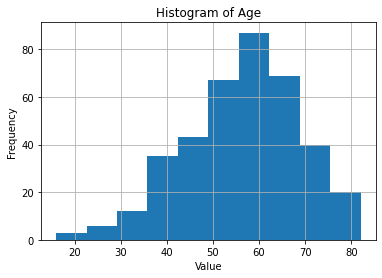

In [22]:
import matplotlib.pyplot as plt

df = ov_metadata_2

# Histogram of 'col1'
df['Age'].hist(bins=10)
plt.title('Histogram of Age')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Mask None Cancer Samples from Dataset 1

cond_1 = metaData_2['Disease'].str.contains("no cancer")
cond_2 = metaData_2['Sex'].str.contains("Female")

mask = cond_1 & cond_2

none_cancer_MetaData_2 = metaData_2.loc[mask]
#Drop Sex Column
none_cancer_MetaData_2.drop('Sex', axis=1, inplace=True)

# set default value
none_cancer_MetaData_2['Stage'] = 0
none_cancer_MetaData_2['Disease'] = "non-Cancer"

none_cancer_MetaData_2


C:\Users\aisa\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-9-a1cff243910b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  none_cancer_MetaData_2['Stage'] = 0
<ipython-input-9-a1cff243910b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,ID,Disease,Stage,Age
3107,GSM6486278,non-Cancer,0,72
3108,GSM6486279,non-Cancer,0,69
3111,GSM6486282,non-Cancer,0,71
3112,GSM6486283,non-Cancer,0,74
3113,GSM6486284,non-Cancer,0,72
...,...,...,...,...
15193,GSM6498364,non-Cancer,0,45
15194,GSM6498365,non-Cancer,0,53
15195,GSM6498366,non-Cancer,0,67
15196,GSM6498367,non-Cancer,0,43


In [23]:
ov_metadata = ov_metadata_2.append(ovMetaData_1, ignore_index=True)
ov_metadata

,ID,Disease,Stage,Age
0,GSM6494241,ovarian cancer,2,56
1,GSM6494242,ovarian cancer,2,68
2,GSM6494243,ovarian cancer,1,32
3,GSM6494244,ovarian cancer,2,52
4,GSM6494245,ovarian cancer,3,40
...,...,...,...,...
695,GSM2854507,Ovarian Cancer OV0433,1,38
696,GSM2854508,Ovarian Cancer OV0436,3,59
697,GSM2854509,Ovarian Cancer OV0439,1,54
698,GSM2854510,Ovarian Cancer OV0440,3,62


In [12]:
none_cancer_MetaData = none_cancer_MetaData_2.append(none_cancer_MetaData_1, ignore_index = True)
none_cancer_MetaData

,ID,Disease,Stage,Age
0,GSM6486278,non-Cancer,0,72
1,GSM6486279,non-Cancer,0,69
2,GSM6486282,non-Cancer,0,71
3,GSM6486283,non-Cancer,0,74
4,GSM6486284,non-Cancer,0,72
...,...,...,...,...
5929,GSM2854092,non-Cancer NB14082603,0,56
5930,GSM2854093,non-Cancer NB14082702,0,56
5931,GSM2854094,non-Cancer NB14091901,0,56
5932,GSM2854095,non-Cancer NB14101003,0,56


--------------------------------------
Merge Data and Meta Data
---------------------------------

In [24]:
path = r"./GEO Samples/GSE106817/Samples/GSE106817_RAW/GSE106817_Raw_Sample_files.csv"
data_1 = pd.read_csv(path)
data_1

,ID,MIMAT0004501,MIMAT0002844,MIMAT0002843,MIMAT0002824,MIMAT0002823,MIMAT0002807,MIMAT0002806,MIMAT0001635,MIMAT0001631,...,MIMAT0022965,MIMAT0022948,MIMAT0027678,MIMAT0027677,MIMAT0027662,MIMAT0027661,MIMAT0027646,MIMAT0027645,MIMAT0027630,MIMAT0027629
0,GSM2850709,73.666741,72.111405,71.341913,75.194389,70.870683,72.029542,70.795544,70.153202,74.788287,...,67.399068,73.617964,75.941798,66.573414,69.513890,72.661265,69.182798,72.057357,72.742872,69.833113
1,GSM2850710,70.683921,74.243225,76.891432,75.592536,73.159304,74.399045,77.070311,74.968704,81.882352,...,67.822738,71.524435,71.444863,70.872130,68.868805,79.387575,70.712644,72.604690,73.222807,71.760760
2,GSM2850711,70.815732,69.506095,71.075206,75.207255,71.427502,73.715987,70.388913,70.428831,105.297610,...,67.395087,73.119943,74.569598,67.270232,72.201108,72.469498,68.327205,71.467505,70.433565,76.053390
3,GSM2850712,77.400533,77.375505,79.929305,84.612952,79.089451,78.010816,76.682754,75.165586,93.018896,...,75.539965,83.441202,81.890179,75.251411,77.848652,77.750365,77.528941,82.008421,81.057614,78.954433
4,GSM2850713,81.754654,81.014768,85.754313,89.885890,78.232733,81.896997,78.948887,81.799711,101.522312,...,77.301863,91.620314,89.056055,77.770712,76.650729,84.824454,76.256971,83.572199,86.654459,85.623393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,GSM2854750,68.165653,76.438012,69.763515,83.423606,71.823781,78.551299,71.302485,69.595249,73.379120,...,66.899756,76.107287,100.439793,69.765538,73.999936,86.242170,69.893890,81.487061,83.515956,70.265179
4042,GSM2854751,66.439675,68.438569,66.390121,78.855693,68.676941,73.217761,68.189975,68.411612,71.108768,...,64.828639,71.473479,92.221666,64.662081,68.975581,77.441213,68.818140,79.015128,74.671355,69.446798
4043,GSM2854752,68.734171,71.477456,72.761171,90.299150,69.783158,74.837632,71.256230,68.020635,68.305375,...,68.466628,83.446271,122.070894,67.261573,70.684709,90.028699,68.846277,82.703459,92.025870,72.173795
4044,GSM2854753,71.885898,84.208434,76.653755,92.902488,75.855554,86.572369,73.805025,76.478828,134.689123,...,69.655233,98.322161,140.531747,73.738100,85.418333,114.831968,76.294256,92.729231,111.937078,81.112643


In [21]:
summary_stats_1 = pd.DataFrame({
    'min': data_1.min(),
    'max': data_1.max(),
    'mean': data_1.mean(),
    'variance': data_1.var()
})

print(summary_stats_1)

                     min         max        mean     variance
ID            GSM2850709  GSM2854754         NaN          NaN
MIMAT0000062     30.9373     272.188   69.776255   208.456398
MIMAT0000063     34.8016     253.675   71.750298   215.185267
MIMAT0000064     30.5116     225.007   69.481555   191.761535
MIMAT0000065     30.6526     238.332   69.971989   204.196111
...                  ...         ...         ...          ...
MIMAT0032116     42.5698     451.042  105.077131  1467.401366
MIMAT0033692     45.8962     431.017   93.633906   931.679048
MIMAT0035542     37.4821     209.523   76.874032   329.745239
MIMAT0035703     30.2809     148.471   66.622392   160.695522
MIMAT0035704     28.8216     148.189   66.140583   142.585054

[2550 rows x 4 columns]


In [25]:
path = r"./GEO Samples/GSE211692/Samples/GSE211692_Raw_Sample_files.csv"
data_2 = pd.read_csv(path)
data_2

,ID,MIMAT0004501,MIMAT0002844,MIMAT0002843,MIMAT0002824,MIMAT0002823,MIMAT0002807,MIMAT0002806,MIMAT0001635,MIMAT0001631,...,MIMAT0022965,MIMAT0022948,MIMAT0027678,MIMAT0027677,MIMAT0027662,MIMAT0027661,MIMAT0027646,MIMAT0027645,MIMAT0027630,MIMAT0027629
0,GSM6483171,56.847241,56.132793,54.320361,81.837742,51.304635,63.617516,59.963161,52.791166,67.156406,...,55.943314,72.092542,105.518825,55.900304,60.873470,80.447581,58.169422,74.539130,73.761820,61.043855
1,GSM6483172,52.015557,57.929098,51.365316,79.436405,53.957861,61.162818,56.852265,50.292433,60.644344,...,52.287042,76.228736,108.305469,51.869452,54.788668,84.209177,56.917724,89.000018,72.306331,60.194463
2,GSM6483173,54.023395,56.589050,55.907838,79.635037,53.452589,67.933299,55.671719,49.728168,96.881313,...,55.654730,81.982109,101.137080,52.958806,61.036920,93.662183,62.847806,80.954964,78.542758,60.894432
3,GSM6483174,52.753029,54.692745,50.822404,87.185541,52.220982,67.618257,52.066346,53.716319,113.455648,...,52.542901,76.683095,133.004830,51.972909,58.268871,96.824523,58.893035,83.048112,86.914982,56.281433
4,GSM6483175,71.207246,72.642474,61.846491,114.983294,69.372332,84.128884,83.722345,71.265394,116.347247,...,74.102734,113.836922,151.762692,72.396093,80.756157,128.491580,79.809953,107.949019,99.126774,83.886240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16185,GSM6499356,90.481438,71.035680,45.155518,167.761672,47.965158,378.338845,43.985662,41.067644,52.538022,...,35.842256,164.189282,732.036177,36.594522,77.380353,180.757068,40.555349,180.855897,119.524566,33.472963
16186,GSM6499357,75.871836,76.577024,49.185056,150.863390,50.755624,95.928366,43.587263,39.641827,55.305641,...,35.491738,133.066598,346.146609,36.418355,49.415266,103.039884,38.358972,96.160855,61.701770,37.303723
16187,GSM6499358,124.536441,140.982392,133.259757,215.122851,140.251059,180.022427,115.810702,115.450086,266.112491,...,108.412810,175.967957,423.856265,111.687469,123.000902,189.606922,113.961433,166.188470,139.296230,112.715554
16188,GSM6499359,49.694548,50.826868,51.959200,141.718924,50.902607,111.760164,49.588414,44.592872,149.928291,...,41.581351,100.348765,263.638190,45.758748,52.583684,97.771205,49.885319,97.329637,66.674846,40.199803


In [22]:
summary_stats_2 = pd.DataFrame({
    'min': data_2.min(),
    'max': data_2.max(),
    'mean': data_2.mean(),
    'variance': data_2.var()
})

print(summary_stats_2)

                     min         max       mean     variance
ID            GSM6483171  GSM6499360        NaN          NaN
MIMAT0000062      25.403     489.609  68.155794   306.105488
MIMAT0000063     24.2909     267.705  68.595823   228.542600
MIMAT0000064     24.3886      262.61  67.041289   213.956868
MIMAT0000065     24.4194     582.285  68.918776   762.683787
...                  ...         ...        ...          ...
MIMAT0032116     30.4082      494.36  94.013902  1417.708621
MIMAT0033692     26.3924      1257.2  82.372112   918.257533
MIMAT0035542     25.9028     215.407  70.846344   311.920507
MIMAT0035703     22.8126     164.042  63.339537   174.436913
MIMAT0035704     22.9118     180.341  63.471154   162.628804

[2550 rows x 4 columns]


In [26]:
data =  data_2.append(data_1, ignore_index = True)
data

,ID,MIMAT0004501,MIMAT0002844,MIMAT0002843,MIMAT0002824,MIMAT0002823,MIMAT0002807,MIMAT0002806,MIMAT0001635,MIMAT0001631,...,MIMAT0022965,MIMAT0022948,MIMAT0027678,MIMAT0027677,MIMAT0027662,MIMAT0027661,MIMAT0027646,MIMAT0027645,MIMAT0027630,MIMAT0027629
0,GSM6483171,56.847241,56.132793,54.320361,81.837742,51.304635,63.617516,59.963161,52.791166,67.156406,...,55.943314,72.092542,105.518825,55.900304,60.873470,80.447581,58.169422,74.539130,73.761820,61.043855
1,GSM6483172,52.015557,57.929098,51.365316,79.436405,53.957861,61.162818,56.852265,50.292433,60.644344,...,52.287042,76.228736,108.305469,51.869452,54.788668,84.209177,56.917724,89.000018,72.306331,60.194463
2,GSM6483173,54.023395,56.589050,55.907838,79.635037,53.452589,67.933299,55.671719,49.728168,96.881313,...,55.654730,81.982109,101.137080,52.958806,61.036920,93.662183,62.847806,80.954964,78.542758,60.894432
3,GSM6483174,52.753029,54.692745,50.822404,87.185541,52.220982,67.618257,52.066346,53.716319,113.455648,...,52.542901,76.683095,133.004830,51.972909,58.268871,96.824523,58.893035,83.048112,86.914982,56.281433
4,GSM6483175,71.207246,72.642474,61.846491,114.983294,69.372332,84.128884,83.722345,71.265394,116.347247,...,74.102734,113.836922,151.762692,72.396093,80.756157,128.491580,79.809953,107.949019,99.126774,83.886240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20231,GSM2854750,68.165653,76.438012,69.763515,83.423606,71.823781,78.551299,71.302485,69.595249,73.379120,...,66.899756,76.107287,100.439793,69.765538,73.999936,86.242170,69.893890,81.487061,83.515956,70.265179
20232,GSM2854751,66.439675,68.438569,66.390121,78.855693,68.676941,73.217761,68.189975,68.411612,71.108768,...,64.828639,71.473479,92.221666,64.662081,68.975581,77.441213,68.818140,79.015128,74.671355,69.446798
20233,GSM2854752,68.734171,71.477456,72.761171,90.299150,69.783158,74.837632,71.256230,68.020635,68.305375,...,68.466628,83.446271,122.070894,67.261573,70.684709,90.028699,68.846277,82.703459,92.025870,72.173795
20234,GSM2854753,71.885898,84.208434,76.653755,92.902488,75.855554,86.572369,73.805025,76.478828,134.689123,...,69.655233,98.322161,140.531747,73.738100,85.418333,114.831968,76.294256,92.729231,111.937078,81.112643


In [30]:
filepath = "./GEO Samples/all_RAW_data_from_both_GSE106817_GSE211692_merged.csv"
data.to_csv(filepath, index=False)

In [27]:
Ov_merged_data_with_metadata = pd.merge(ov_metadata, data, on='ID', how='left')
Ov_merged_data_with_metadata.drop('Disease', axis=1, inplace=True)
Ov_merged_data_with_metadata

,ID,Stage,Age,MIMAT0004501,MIMAT0002844,MIMAT0002843,MIMAT0002824,MIMAT0002823,MIMAT0002807,MIMAT0002806,...,MIMAT0022965,MIMAT0022948,MIMAT0027678,MIMAT0027677,MIMAT0027662,MIMAT0027661,MIMAT0027646,MIMAT0027645,MIMAT0027630,MIMAT0027629
0,GSM6494241,2,56,52.467861,53.021144,50.275415,58.987391,53.941752,54.889724,54.923904,...,52.486087,59.057645,63.943554,51.248290,54.046993,60.030709,51.739650,58.136470,55.099968,54.653252
1,GSM6494242,2,68,55.456073,55.596486,53.736900,55.706964,52.785368,55.302592,54.983990,...,50.846904,51.088529,56.364364,49.775866,52.393827,54.766599,53.193541,56.368165,55.261253,49.661587
2,GSM6494243,1,32,54.429407,53.664278,51.663155,54.857878,53.620057,55.033662,52.534587,...,49.834865,53.584380,61.506332,50.782825,51.149963,56.163727,47.778377,52.041833,50.912516,49.146638
3,GSM6494244,2,52,50.677996,51.229936,50.756919,52.846291,50.266261,54.602851,49.028448,...,51.025317,51.818724,54.903512,47.921436,49.661399,54.147474,50.916331,53.205626,49.421499,47.606787
4,GSM6494245,3,40,49.869326,50.596737,53.429290,53.915722,50.766180,50.930070,53.944855,...,55.896899,57.862050,57.637417,56.444074,55.201099,58.201697,57.099792,59.285261,60.086523,56.961797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,GSM2854507,1,38,56.605380,61.088193,57.824787,75.537419,58.561304,62.807969,61.290182,...,54.771599,77.011720,75.020213,58.903700,54.218937,74.107539,54.017055,67.721184,71.625404,65.930919
696,GSM2854508,3,59,50.355173,54.255383,56.652122,72.984746,55.774347,63.042314,57.222127,...,49.656376,72.570242,85.099610,48.560569,52.807895,75.189871,53.872718,68.820404,64.708980,59.091917
697,GSM2854509,1,54,52.493641,58.399338,52.554567,58.901810,53.048722,59.012097,56.101727,...,50.057292,67.494830,59.773463,47.796053,50.318010,63.211636,50.501562,57.538726,54.346729,57.824251
698,GSM2854510,3,62,51.777089,54.593145,51.966246,68.846821,54.521761,65.397567,54.550882,...,49.687674,68.603991,68.516205,46.882808,54.042299,61.398654,50.486784,61.848352,63.151477,56.918871


In [27]:
none_cancer_merged_data_with_metadata = pd.merge(none_cancer_MetaData, data, on='ID', how='left')
none_cancer_merged_data_with_metadata.drop('Disease', axis=1, inplace=True)
none_cancer_merged_data_with_metadata

,ID,Stage,Age,MIMAT0004501,MIMAT0002844,MIMAT0002843,MIMAT0002824,MIMAT0002823,MIMAT0002807,MIMAT0002806,...,MIMAT0022965,MIMAT0022948,MIMAT0027678,MIMAT0027677,MIMAT0027662,MIMAT0027661,MIMAT0027646,MIMAT0027645,MIMAT0027630,MIMAT0027629
0,GSM6486278,0,72,74.510004,84.625343,78.080264,156.078575,75.304388,143.147509,86.700630,...,73.833210,136.385821,367.166820,71.325803,86.286297,123.304476,79.208342,110.790716,112.036247,94.349639
1,GSM6486279,0,69,65.170654,69.552992,66.097055,122.164791,65.279417,110.784974,67.817165,...,67.552992,111.651845,392.142331,66.483831,83.485858,116.775429,76.870945,96.708660,102.582119,73.560080
2,GSM6486282,0,71,75.315703,79.064351,69.178697,119.068443,75.209202,108.705201,73.452451,...,84.642104,106.469253,288.733287,75.093684,92.203345,114.850421,78.517102,99.388024,114.220693,85.511181
3,GSM6486283,0,74,73.361005,78.255586,71.625625,156.819267,74.479055,145.497525,77.124905,...,75.978814,127.665427,419.421615,73.633627,93.126390,133.461666,82.872916,112.089136,133.698840,80.824688
4,GSM6486284,0,72,75.981821,84.412764,82.378546,207.061038,79.751039,160.873099,84.181599,...,77.061594,156.146073,566.080356,76.572129,103.857341,143.699868,85.360458,120.101808,135.585545,80.606246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5929,GSM2854092,0,56,63.651665,75.265080,64.751730,187.357229,70.209286,149.216950,67.928092,...,57.427972,186.024781,592.047414,60.336143,86.413255,166.112565,77.671814,113.818750,151.552975,64.147925
5930,GSM2854093,0,56,63.124206,66.084553,62.273276,139.712951,62.284359,123.571037,66.005418,...,57.374125,119.535647,350.546277,59.527045,85.800775,131.874776,71.660610,105.021372,116.101841,63.462866
5931,GSM2854094,0,56,30.497583,36.689500,34.961734,65.871253,39.741752,64.005403,33.068799,...,31.341033,60.553035,197.897145,34.229866,38.855499,54.329287,35.900051,50.327518,56.381352,32.714648
5932,GSM2854095,0,56,34.939189,40.681902,43.327449,98.074796,43.806601,112.876051,41.883546,...,30.504671,108.156035,345.238845,34.749232,41.091777,85.674526,36.155860,73.791857,65.014345,35.130722


In [28]:
filepath = "./GEO Samples/none_cancer_merged_data_with_metadata.csv"
none_cancer_merged_data_with_metadata.to_csv(filepath, index=False)

In [28]:
filepath = "./GEO Samples/Ov_merged_data_with_metadata.csv"
Ov_merged_data_with_metadata.to_csv(filepath, index=False)